In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor as xGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
# Reading the input
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [36]:
# Finding the null values of the dataset and seeing them
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* Customer ID: A unique identifier for each customer.
* Surname: The customer's surname or last name.
* Credit Score: A numerical value representing the customer's credit score.
* Geography: The country where the customer resides.
* Gender: The customer's gender.
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank.
* Balance: The customer's account balance.
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card).
* HasCrCard: Whether the customer has a credit card.
* IsActiveMember: Whether the customer is an active member.
* EstimatedSalary: The estimated salary of the customer.
* Exited: Whether the customer has churned.

In [9]:
# Assigning the gender variable a numerical value for its catgegories
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Graphs

/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

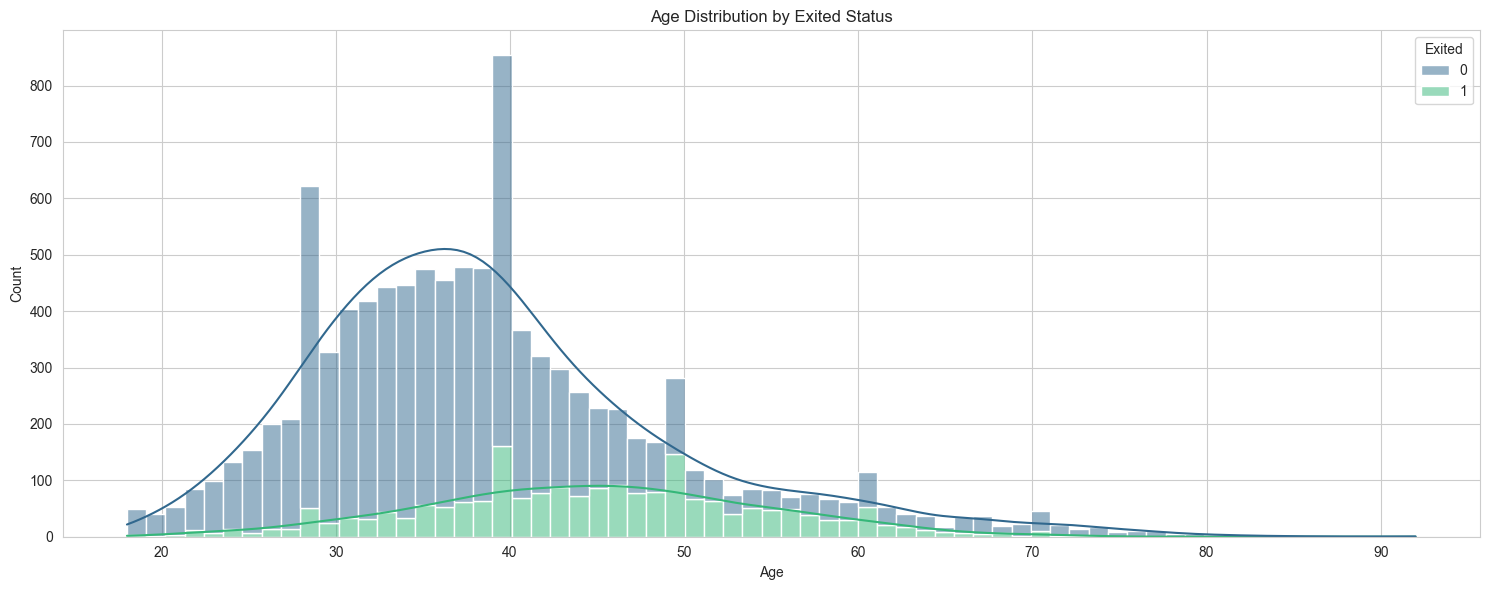

In [10]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df, x='Age', hue='Exited',  multiple="stack",kde=True, palette="viridis")
plt.title('Age Distribution by Exited Status')

plt.tight_layout()
plt.show()

In [11]:
mode = df['Age'][df['Exited'] == 0].mode()[0]
mean = df['Age'][df['Exited'] == 0].mean()
median = df['Age'][df['Exited'] == 0].median()
mode_exit = df['Age'][df['Exited'] == 1].mode()[0]
mean_exit= df['Age'][df['Exited'] == 1].mean()
median_exit = df['Age'][df['Exited'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics    |  Exited = 0 |  Exited= 1       |")
print("-----------------------------------------------------")
print(f"| Mode             |  {mode:<9}  |  {mode_exit:<14}  |")
print(f"| Median           |  {median:<9}  |  {median_exit:<14}  |")
print(f"| Mean             |  {mean:<9.2f}  |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")


-----------------------------------------------------
|    Statistics    |  Exited = 0 |  Exited= 1       |
-----------------------------------------------------
| Mode             |  35         |  46              |
| Median           |  36.0       |  45.0            |
| Mean             |  37.41      |  44.84           |
-----------------------------------------------------


In [12]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

q1_exit_0 = df['Age'][df['Exited'] == 0].quantile(0.25)
q3_exit_0 = df['Age'][df['Exited'] == 0].quantile(0.75)

q1_exit_1 = df['Age'][df['Exited'] == 1].quantile(0.25)
q3_exit_1 = df['Age'][df['Exited'] == 1].quantile(0.75)


print("Quartiles for Age Distribution when Exited = 0:")
print(f"Q1: {q1_exit_0}, Q3: {q3_exit_0}\n")

print("Quartiles for Age Distribution when Exited = 1:")
print(f"Q1: {q1_exit_1}, Q3: {q3_exit_1}")


Quartiles for Age Distribution when Exited = 0:
Q1: 31.0, Q3: 41.0

Quartiles for Age Distribution when Exited = 1:
Q1: 38.0, Q3: 51.0


/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

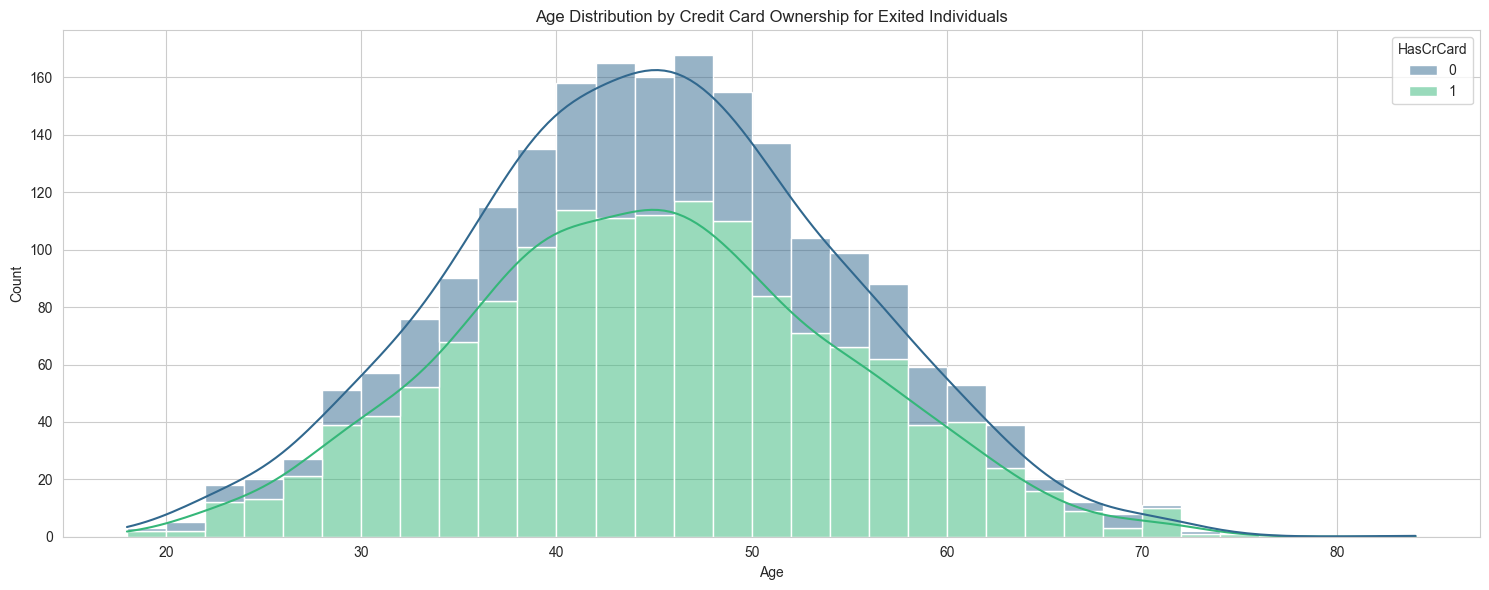

In [13]:
df_exited = df[df['Exited'] == 1]

plt.figure(figsize=(15, 6))

sns.histplot(data=df_exited, x='Age', hue='HasCrCard', multiple="stack", kde=True, palette="viridis")

plt.title('Age Distribution by Credit Card Ownership for Exited Individuals')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [14]:
mode = df_exited['Age'][df['HasCrCard'] == 0].mode()[0]
mean = df_exited['Age'][df['HasCrCard'] == 0].mean()
median = df_exited['Age'][df['HasCrCard'] == 0].median()
mode_exit = df_exited['Age'][df['HasCrCard'] == 1].mode()[0]
mean_exit= df_exited['Age'][df['HasCrCard'] == 1].mean()
median_exit = df_exited['Age'][df['HasCrCard'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics  | HasCrCard = 0 |  HasCrCard= 1   |")
print("-----------------------------------------------------")
print(f"| Mode           |  {mode:<9}    |  {mode_exit:<14}  |")
print(f"| Median         |  {median:<9}    |  {median_exit:<14}  |")
print(f"| Mean           |  {mean:<9.2f}    |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")


-----------------------------------------------------
|    Statistics  | HasCrCard = 0 |  HasCrCard= 1   |
-----------------------------------------------------
| Mode           |  47           |  46              |
| Median         |  45.0         |  45.0            |
| Mean           |  45.28        |  44.65           |
-----------------------------------------------------


/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

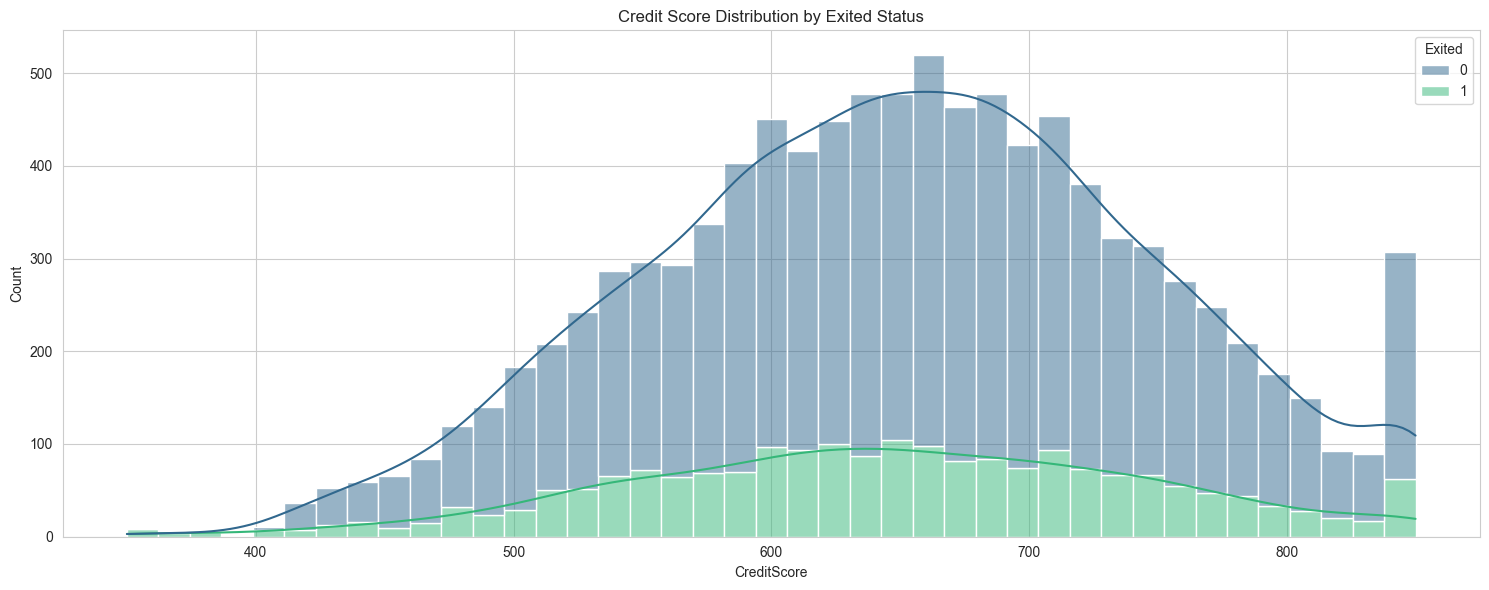

In [15]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df, x='CreditScore', hue='Exited',  multiple="stack",kde=True,  palette="viridis")
plt.title('Credit Score Distribution by Exited Status')

plt.tight_layout()
plt.show()

In [16]:
mode = df['CreditScore'][df['Exited'] == 0].mode()[0]
mean = df['CreditScore'][df['Exited'] == 0].mean()
median = df['CreditScore'][df['Exited'] == 0].median()
mode_exit = df['CreditScore'][df['Exited'] == 1].mode()[0]
mean_exit= df['CreditScore'][df['Exited'] == 1].mean()
median_exit = df['CreditScore'][df['Exited'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics    |  Exited = 0 |  Exited= 1       |")
print("-----------------------------------------------------")
print(f"| Mode             |  {mode:<9}  |  {mode_exit:<14}  |")
print(f"| Median           |  {median:<9}  |  {median_exit:<14}  |")
print(f"| Mean             |  {mean:<9.2f}  |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")


-----------------------------------------------------
|    Statistics    |  Exited = 0 |  Exited= 1       |
-----------------------------------------------------
| Mode             |  850        |  850             |
| Median           |  653.0      |  646.0           |
| Mean             |  651.85     |  645.35          |
-----------------------------------------------------


In [17]:
q1 = df['CreditScore'].quantile(0.25)
q3 = df['CreditScore'].quantile(0.75)

q1_exit_0 = df['CreditScore'][df['Exited'] == 0].quantile(0.25)
q3_exit_0 = df['CreditScore'][df['Exited'] == 0].quantile(0.75)

q1_exit_1 = df['CreditScore'][df['Exited'] == 1].quantile(0.25)
q3_exit_1 = df['CreditScore'][df['Exited'] == 1].quantile(0.75)


print("Quartiles for Age Distribution when Exited = 0:")
print(f"Q1: {q1_exit_0}, Q3: {q3_exit_0}\n")

print("Quartiles for Age Distribution when Exited = 1:")
print(f"Q1: {q1_exit_1}, Q3: {q3_exit_1}")


Quartiles for Age Distribution when Exited = 0:
Q1: 585.0, Q3: 718.0

Quartiles for Age Distribution when Exited = 1:
Q1: 578.0, Q3: 716.0


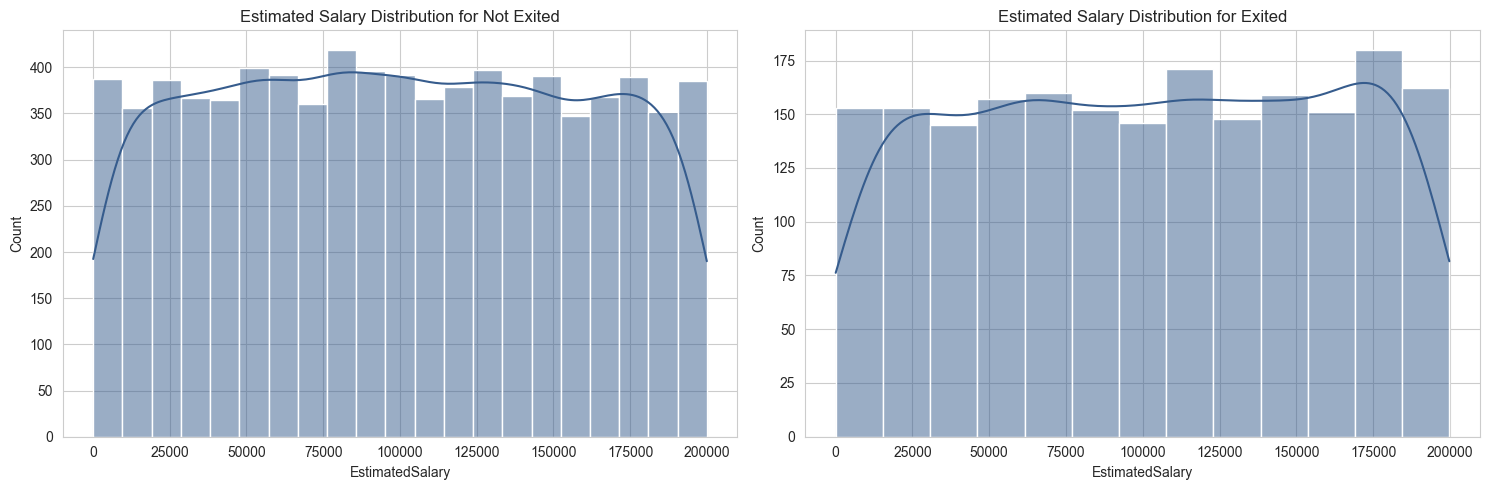

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df.loc[df['Exited'] == 0], x="EstimatedSalary", kde=True, color=sns.color_palette("viridis")[1])
plt.title("Estimated Salary Distribution for Not Exited")

plt.subplot(1, 2, 2)
sns.histplot(data=df.loc[df['Exited'] == 1], x="EstimatedSalary", kde=True, color=sns.color_palette("viridis")[1])
plt.title("Estimated Salary Distribution for Exited")

plt.tight_layout()
plt.show()

In [19]:
mode = df['EstimatedSalary'][df['Exited'] == 0].mode()[0]
mean = df['EstimatedSalary'][df['Exited'] == 0].mean()
median = df['EstimatedSalary'][df['Exited'] == 0].median()
mode_exit = df['EstimatedSalary'][df['Exited'] == 1].mode()[0]
mean_exit= df['EstimatedSalary'][df['Exited'] == 1].mean()
median_exit = df['EstimatedSalary'][df['Exited'] == 1].median()

print("-----------------------------------------------------")
print("|    Statistics    |  Exited = 0 |  Exited= 1       |")
print("-----------------------------------------------------")
print(f"| Mode             |  {mode:<9}  |  {mode_exit:<14}  |")
print(f"| Median           |  {median:<9}  |  {median_exit:<14.2f}  |")
print(f"| Mean             |  {mean:<9.2f}  |  {mean_exit:<14.2f}  |")
print("-----------------------------------------------------")


-----------------------------------------------------
|    Statistics    |  Exited = 0 |  Exited= 1       |
-----------------------------------------------------
| Mode             |  24924.92   |  11.58           |
| Median           |  99645.04   |  102460.84       |
| Mean             |  99738.39   |  101465.68       |
-----------------------------------------------------


/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

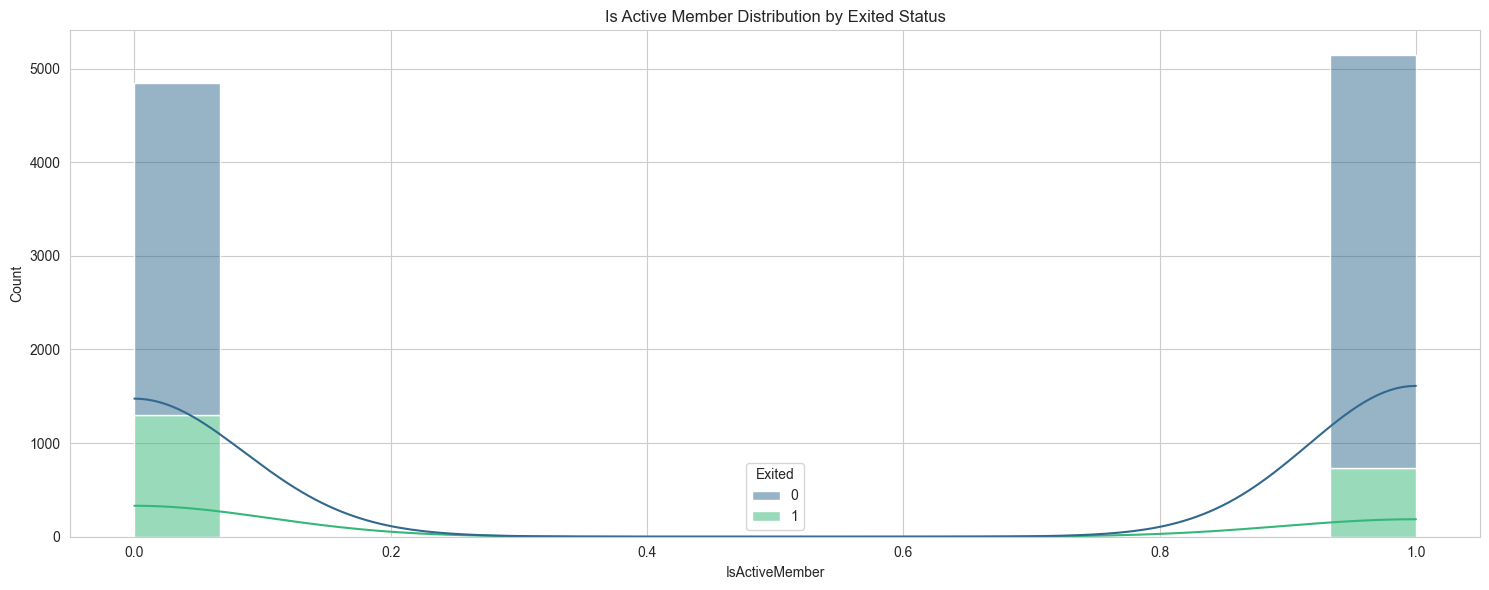

In [20]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df, x='IsActiveMember', hue='Exited',  multiple="stack",kde=True,  palette="viridis")
plt.title('Is Active Member Distribution by Exited Status')

plt.tight_layout()
plt.show()

/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kausik/.local/share/virtualenvs/CodSoft-Dx2vzRgQ/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

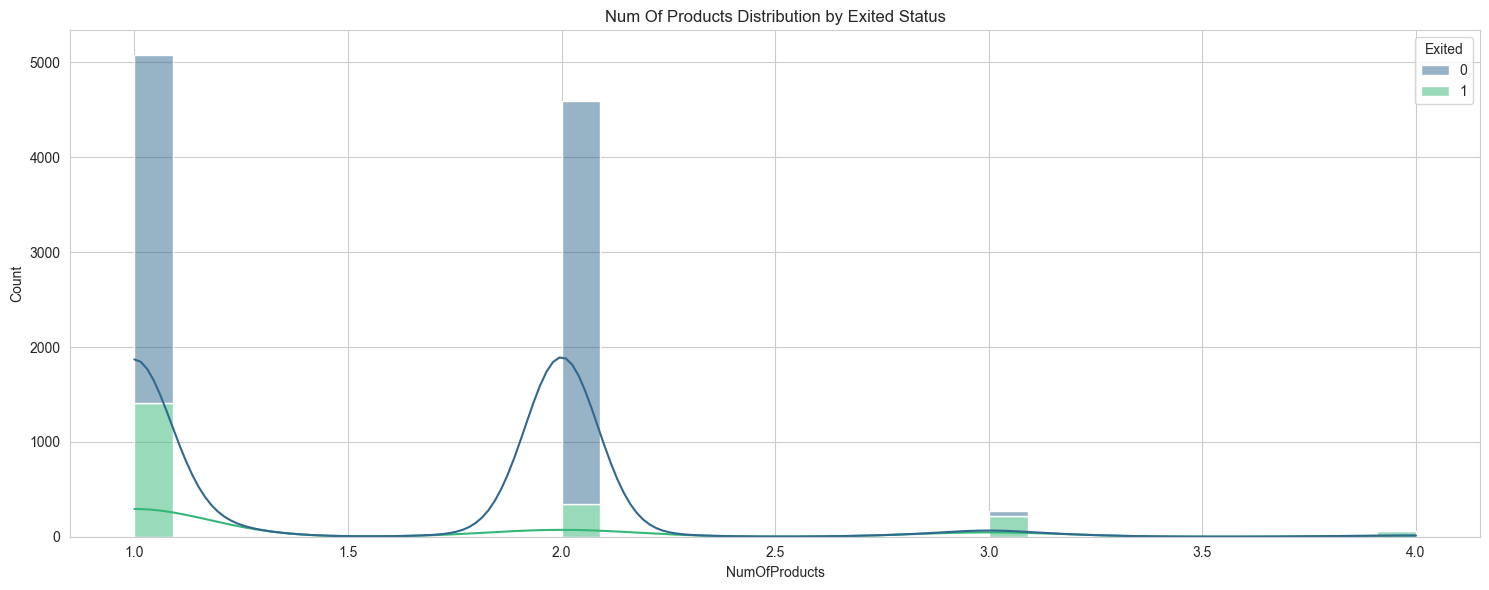

In [21]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df, x='NumOfProducts', hue='Exited',  multiple="stack",kde=True,  palette="viridis")
plt.title('Num Of Products Distribution by Exited Status')

plt.tight_layout()
plt.show()

In [22]:
churn_count = df[df['Exited'] == 1].groupby('Geography').size().reset_index(name='churn_count')

non_churn_count = df[df['Exited'] == 0].groupby('Geography').size().reset_index(name='non_churn_count')

combined_count = churn_count.merge(non_churn_count, on='Geography')

total_count = df['Geography'].value_counts().reset_index()
total_count.columns = ['Geography', 'total_count']
combined_count = combined_count.merge(total_count, on='Geography')
combined_count['churn_percentage'] = (combined_count['churn_count'] / combined_count['total_count']).round(4) * 100

combined_count


,Geography,churn_count,non_churn_count,total_count,churn_percentage
0,France,810,4204,5014,16.15
1,Germany,814,1695,2509,32.44
2,Spain,413,2064,2477,16.67


In [23]:
df['Geography'] = df['Geography'].map({'France': 1, 'Germany': 2, 'Spain': 3})

In [24]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)


In [25]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,3,0,43,2,125510.82,1,1,1,79084.10,0


In [41]:
X = df.drop(['RowNumber','Exited'],axis=1)
y = df["Exited"]
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3)

In [42]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

# Naive Bayes


In [27]:
# Removing the disproportion in the variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8253333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2409
           1       0.66      0.23      0.34       591

    accuracy                           0.83      3000
   macro avg       0.75      0.60      0.62      3000
weighted avg       0.80      0.83      0.79      3000


# Decision Tree

With max_depth = 5

In [30]:
from sklearn.tree import DecisionTreeClassifier

for i in range(5,21):
    modelo_tree = DecisionTreeClassifier(max_depth=i)

    modelo_tree.fit(X_train,y_train)

    acc_tree = round(modelo_tree.score(X_train,y_train) * 100, 2)
    predict_tree=modelo_tree.predict(X_test)
    print("Accuracy of the Decision Tree Classifier model for max_depth {} is: {}".format(i,acc_tree))
    del modelo_tree


Accuracy of the Decision Tree Classifier model for max_depth 5 is: 85.71
Accuracy of the Decision Tree Classifier model for max_depth 6 is: 86.04
Accuracy of the Decision Tree Classifier model for max_depth 7 is: 86.86
Accuracy of the Decision Tree Classifier model for max_depth 8 is: 88.09
Accuracy of the Decision Tree Classifier model for max_depth 9 is: 89.47
Accuracy of the Decision Tree Classifier model for max_depth 10 is: 90.7
Accuracy of the Decision Tree Classifier model for max_depth 11 is: 92.36
Accuracy of the Decision Tree Classifier model for max_depth 12 is: 93.99
Accuracy of the Decision Tree Classifier model for max_depth 13 is: 95.71
Accuracy of the Decision Tree Classifier model for max_depth 14 is: 96.81
Accuracy of the Decision Tree Classifier model for max_depth 15 is: 97.89
Accuracy of the Decision Tree Classifier model for max_depth 16 is: 98.53
Accuracy of the Decision Tree Classifier model for max_depth 17 is: 98.97
Accuracy of the Decision Tree Classifier mod

With max_depth = 10

# Randon Forest

With max_depth = 5

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators=5)
random_model.fit(X_train,y_train)


acc_randon_tree = round(random_model.score(X_train,y_train) * 100, 2)
print("Accuracy of the Random Forest model is: {}".format(acc_randon_tree))
random_prediction=random_model.predict(X_test)

Accuracy of the Random Forest model is: 97.53


With max_depth = 10

In [32]:
random_model = RandomForestClassifier(n_estimators=10)
random_model.fit(X_train,y_train)

acc_randon_tree = round(random_model.score(X_train,y_train) * 100, 2)
print("Accuracy of the Random Forest model is: {}".format(acc_randon_tree))
prediction_random=random_model.predict(X_test)

Accuracy of the Random Forest model is: 98.54


# XGBoost

## Without Parameters

In [33]:
xgb = xGBRegressor()
xgb.fit(X_train,y_train)
xgbtd=xgb.predict(X_train)
xgbr2=r2_score(y_train,xgbtd)

In [34]:
xgbr2 = r2_score(y_train, xgbtd)

print('R-squared for the test set:', xgbr2*100)

R-squared for the test set: 83.23172462101078


## With Parameters

In [43]:
xgb = xGBRegressor(max_depth=10,eval_metric='rmse',colsample_bytree=0.6)
xgb.fit(X_train,y_train)
xgbtd=xgb.predict(X_train)
xgbr2=r2_score(y_train,xgbtd)

In [44]:
xgbr2 = r2_score(y_train, xgbtd)

print('R-squared for the test set:', xgbr2*100)

R-squared for the test set: 99.53495492382713


# From the above inferences, we can conclude that the XGBoost has a better accuracy

In [45]:
import joblib
joblib.dump(xgb,"final_XGB_model.pkl")

['final_XGB_model.pkl']